# Chapter8 Exercises

## Exercise 1

In [1]:
import numpy as np 
def p(x, coef):
    X = np.ones_like(coef)
    X[1:] = x
    y = np.cumprod(X)
    return coef @ y

x = 2
coef = np.linspace(2, 4, 3)
print(coef)
print(p(x, coef))
q = np.poly1d(np.flip(coef))
print(q(x))

[2. 3. 4.]
24.0
24.0


## Exercise 2

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline
from numpy import cumsum
from numpy.random import uniform

class DiscreteRV:
    def __init__(self, q):
        self.q = q
        self.Q = cumsum(q)

    def draw(self, k = 1):
        return self.Q.searchsorted(uniform(0, 1, size = k))

q = (0.1, 0.9)
d = DiscreteRV(q)
d.q = (0.5, 0.5)

## Exercise 3

In [3]:
class ECDF:

    def __init__(self, observations):
        self.observations = np.asarray(observations)

    def __call__(self, x):
        return np.mean(self.observations <= x)

    def plot(self, a = None, b = None):
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.max() + self.observations.std()
        x_vals = np.linspace(a, b, num = 100)
        f = np.vectorize(self.__call__)
        plt.plot(x_vals, f(x_vals))
        plt.show()

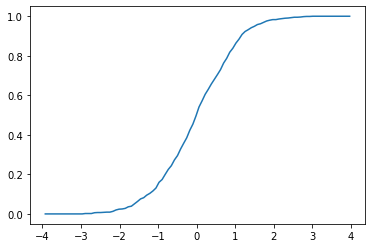

In [11]:
X = np.random.randn(1000)
F = ECDF(X)
F.plot()